In [ ]:
from google.colab import output, drive, files # specific to Google Colab
import pandas as pd
import numpy as np
import plotly.express as px
import requests
import warnings
import plotly.express as px

In [ ]:
pd.options.display.max_columns = None

In [ ]:
census_api_key = '6226da4cc273f111945eff9b79c22461af193478'
url= "https://api.census.gov/data/2017/ecnbasic?get=NAICS2017_LABEL,NAICS2017,FEDDL,ESTCNO,ESTCIN,EMPSMCD,EMP,HOURS,RCPNCW,INVFINB,RCPOTH,RCPTOT_IMP,VALADD,GEO_ID,FIRM&for=consolidated%20city:*&key=6226da4cc273f111945eff9b79c22461af193478"
response = requests.request('GET',url)
response.text


'[["NAICS2017_LABEL","NAICS2017","FEDDL","ESTCNO","ESTCIN","EMPSMCD","EMP","HOURS","RCPNCW","INVFINB","RCPOTH","RCPTOT_IMP","VALADD","GEO_ID","FIRM","state","consolidated city"],\n["Retail trade","44-45","0","0","0","0","2175","0","0","0","0","0","0","1700000US3011390","144","30","11390"],\n["Motor vehicle and parts dealers","441","0","0","0","0","332","0","0","0","0","0","0","1700000US3011390","18","30","11390"],\n["Automobile dealers","4411","0","0","0","0","204","0","0","0","0","0","0","1700000US3011390","7","30","11390"],\n["New car dealers","44111","0","0","0","0","0","0","0","0","0","0","0","1700000US3011390","0","30","11390"],\n["New car dealers","441110","0","0","0","0","0","0","0","0","0","0","0","1700000US3011390","0","30","11390"],\n["Other motor vehicle dealers","4412","0","0","0","0","48","0","0","0","0","0","0","1700000US3011390","5","30","11390"],\n["Motorcycle, boat, and other motor vehicle dealers","44122","0","0","0","0","0","0","0","0","0","0","0","1700000US3011390",

In [ ]:
def json_to_dataframe(response) :
  '''
  Convert response to dataframe
  '''
  return pd.DataFrame(response.json()[1:], columns=response.json()[0])

In [ ]:
census =json_to_dataframe(response)
census

,NAICS2017_LABEL,NAICS2017,FEDDL,ESTCNO,ESTCIN,EMPSMCD,EMP,HOURS,RCPNCW,INVFINB,RCPOTH,RCPTOT_IMP,VALADD,GEO_ID,FIRM,state,consolidated city
0,Retail trade,44-45,0,0,0,0,2175,0,0,0,0,0,0,1700000US3011390,144,30,11390
1,Motor vehicle and parts dealers,441,0,0,0,0,332,0,0,0,0,0,0,1700000US3011390,18,30,11390
2,Automobile dealers,4411,0,0,0,0,204,0,0,0,0,0,0,1700000US3011390,7,30,11390
3,New car dealers,44111,0,0,0,0,0,0,0,0,0,0,0,1700000US3011390,0,30,11390
4,New car dealers,441110,0,0,0,0,0,0,0,0,0,0,0,1700000US3011390,0,30,11390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4274,"Other similar organizations (except business, ...",81399,0,0,0,0,111,0,0,0,0,0,0,1700000US2148003,21,21,48003
4275,"Other similar organizations (except business, ...",813990,0,0,0,0,111,0,0,0,0,0,0,1700000US2148003,21,21,48003
4276,Home and garden equipment and appliance repair...,81141,0,0,0,0,44,0,0,0,0,0,0,1700000US2148003,11,21,48003
4277,Commercial and industrial machinery and equipm...,811310,0,0,0,0,751,0,0,0,0,0,0,1700000US2148003,58,21,48003


In [ ]:
json_to_dataframe(response).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4279 entries, 0 to 4278
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NAICS2017_LABEL    4279 non-null   object
 1   NAICS2017          4279 non-null   object
 2   FEDDL              4279 non-null   object
 3   ESTCNO             4279 non-null   object
 4   ESTCIN             4279 non-null   object
 5   EMPSMCD            4279 non-null   object
 6   EMP                4279 non-null   object
 7   HOURS              4279 non-null   object
 8   RCPNCW             4279 non-null   object
 9   INVFINB            4279 non-null   object
 10  RCPOTH             4279 non-null   object
 11  RCPTOT_IMP         4279 non-null   object
 12  VALADD             4279 non-null   object
 13  GEO_ID             4279 non-null   object
 14  FIRM               4279 non-null   object
 15  state              4279 non-null   object
 16  consolidated city  4279 non-null   object


##**valores Duplicados**

In [ ]:
from pandas.core.base import value_counts
print(census.shape)
train= census.drop_duplicates()
print(census.shape)

(4279, 17)
(4279, 17)


se reemplazan los ceros por NAN, para proposuitos de aprendizaje, en las siguiente columnas: "FEDDL","ESTCNO","ESTCIN","EMPSMCD"

In [ ]:
census_f = census.replace({"FEDDL":{0:np.nan}, "ESTCNO":{0:np.nan},"ESTCIN":{0:np.nan}, "EMPSMCD":{0:np.nan} })
print(census_f)



                                        NAICS2017_LABEL NAICS2017  FEDDL  \
0                                          Retail trade     44-45    NaN   
1                       Motor vehicle and parts dealers       441    NaN   
2                                    Automobile dealers      4411    NaN   
3                                       New car dealers     44111    NaN   
4                                       New car dealers    441110    NaN   
...                                                 ...       ...    ...   
4274  Other similar organizations (except business, ...     81399    NaN   
4275  Other similar organizations (except business, ...    813990    NaN   
4276  Home and garden equipment and appliance repair...     81141    NaN   
4277  Commercial and industrial machinery and equipm...    811310    NaN   
4278  Personal and household goods repair and mainte...      8114    NaN   

      ESTCNO  ESTCIN  EMPSMCD     EMP  HOURS  RCPNCW  INVFINB  RCPOTH  \
0        NaN  

In [ ]:
census_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4279 entries, 0 to 4278
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NAICS2017_LABEL    4279 non-null   object 
 1   NAICS2017          4279 non-null   object 
 2   FEDDL              0 non-null      float64
 3   ESTCNO             0 non-null      float64
 4   ESTCIN             0 non-null      float64
 5   EMPSMCD            0 non-null      float64
 6   EMP                4279 non-null   float64
 7   HOURS              4279 non-null   float64
 8   RCPNCW             4279 non-null   float64
 9   INVFINB            4279 non-null   float64
 10  RCPOTH             4279 non-null   float64
 11  RCPTOT_IMP         4279 non-null   float64
 12  VALADD             4279 non-null   float64
 13  GEO_ID             4279 non-null   object 
 14  FIRM               4279 non-null   float64
 15  state              4279 non-null   float64
 16  consolidated city  4279 

In [ ]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pd.set_option('display.max_rows', None)  # or 1000
serie = (census_f.isnull().sum()/census_f.shape[0])*100 #isna
serie=serie.sort_values(ascending=False)
serie

FEDDL                100.0
ESTCNO               100.0
ESTCIN               100.0
EMPSMCD              100.0
NAICS2017_LABEL        0.0
RCPTOT_IMP             0.0
state                  0.0
FIRM                   0.0
GEO_ID                 0.0
VALADD                 0.0
RCPNCW                 0.0
RCPOTH                 0.0
INVFINB                0.0
NAICS2017              0.0
HOURS                  0.0
EMP                    0.0
consolidated city      0.0
dtype: float64

<Axes: >

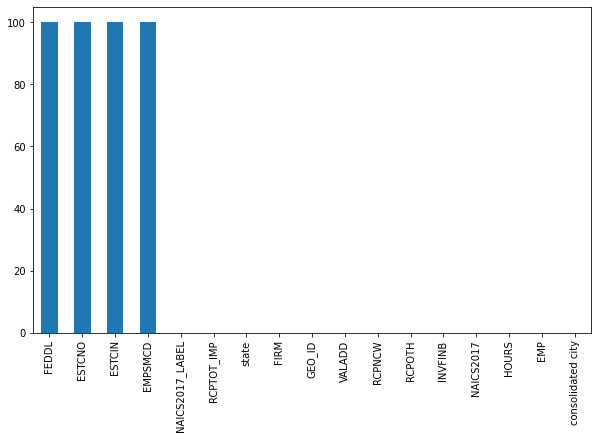

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
serie.plot(kind='bar')

<Axes: >

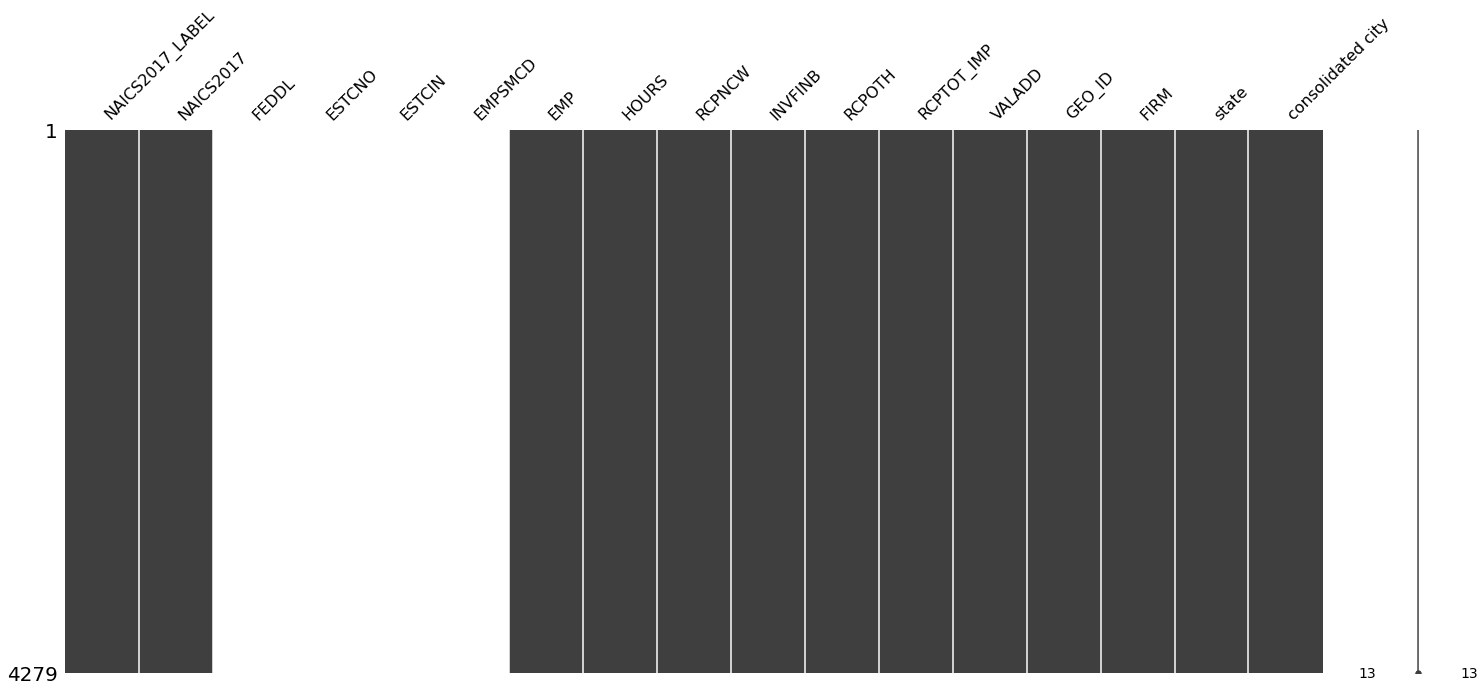

In [ ]:
import missingno as msno
msno.matrix(census_f)

In [ ]:
col_del=["FEDDL","ESTCNO","ESTCIN","EMPSMCD"] # Columnas a borrar que no aportan
census_x=census_f.drop(labels=col_del, axis=1)
census_x.columns

Index(['NAICS2017_LABEL', 'NAICS2017', 'EMP', 'HOURS', 'RCPNCW', 'INVFINB',
       'RCPOTH', 'RCPTOT_IMP', 'VALADD', 'GEO_ID', 'FIRM', 'state',
       'consolidated city'],
      dtype='object')

In [ ]:
census_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4279 entries, 0 to 4278
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NAICS2017_LABEL    4279 non-null   object 
 1   NAICS2017          4279 non-null   object 
 2   EMP                4279 non-null   float64
 3   HOURS              4279 non-null   float64
 4   RCPNCW             4279 non-null   float64
 5   INVFINB            4279 non-null   float64
 6   RCPOTH             4279 non-null   float64
 7   RCPTOT_IMP         4279 non-null   float64
 8   VALADD             4279 non-null   float64
 9   GEO_ID             4279 non-null   object 
 10  FIRM               4279 non-null   float64
 11  state              4279 non-null   float64
 12  consolidated city  4279 non-null   float64
dtypes: float64(10), object(3)
memory usage: 434.7+ KB
